In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#set text size
matplotlib.rcParams['font.size'] = 18

import seaborn as sns

In [8]:
df = pd.read_csv('data.csv',sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [9]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In the data, each row represents observations for one country in of a single year. The format 
of this is is known is <b> Tidy data </b>
It has two categorical vatiables ( Country and continent)
Each column is self-explanatory, such as "lifeExp" represents life expectancy at birth in years,
"pop" represents populations of the country in that year, "gdpPercap" represents GDP (Gross Domestice Product) per person in units of <a href='https://en.wikipedia.org/wiki/International_dollar' >international dollars </a>

### Using PairPlots for Plotting
The default pairs plot in seaborn only plots numerical columns 

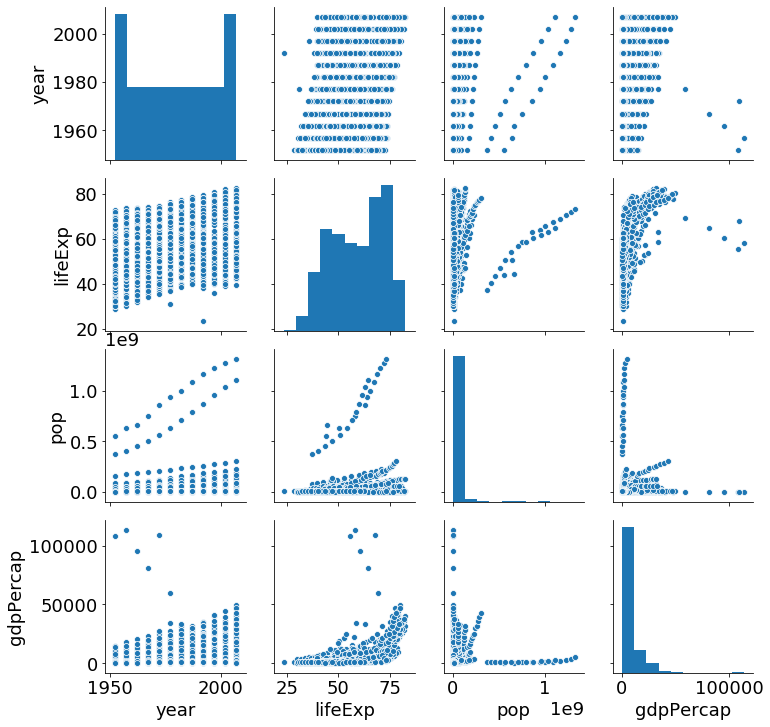

In [11]:
sns.pairplot(df)

The default pairs plot by itself often gives us valuable insights. We see that life expectancy and gdp per capita are positively correlated showing that people in higher income countries tend to live longer (although this of course does not prove that one causes the other). It also appears that (thankfully) life expectancies worldwide are on the rise over time. From the histograms, we learn that the population and gdp variables are heavily right-skewed.

We can also see that the distribution of pop and gdp_per_cap is heavily skewed to the right. To better represent the data, we can take the log transform of those columns.

In [14]:
df['log_pop'] = np.log10(df['pop'])
df['log_gpd_per_cap']  = np.log10(df['gdpPercap'])
df = df.drop(columns = ['pop','gdpPercap'])

In [15]:
df

,country,continent,year,lifeExp,log_pop,log_gpd_per_cap
0,Afghanistan,Asia,1952,28.801,6.925587,2.891786
1,Afghanistan,Asia,1957,30.332,6.965716,2.914265
2,Afghanistan,Asia,1962,31.997,7.011447,2.931000
3,Afghanistan,Asia,1967,34.020,7.062129,2.922309
4,Afghanistan,Asia,1972,36.088,7.116590,2.869221
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,6.964562,2.848901
1700,Zimbabwe,Africa,1992,60.377,7.029560,2.840997
1701,Zimbabwe,Africa,1997,46.809,7.057093,2.898972
1702,Zimbabwe,Africa,2002,39.989,7.076515,2.827394


While this plot alone can be useful in an analysis, we can find make it more valuable by coloring the figures based on a categorical variable such as continent

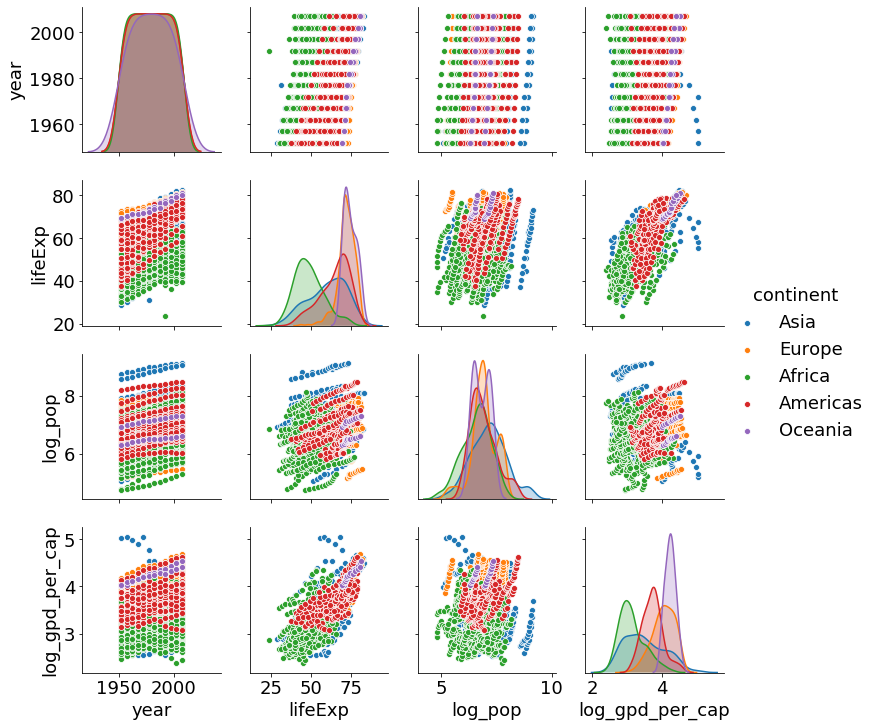

In [23]:
sns.pairplot(df,hue='continent')

Now we see that Oceania and Europe tend to have the highest life expectancies and Asia has the largest population. Notice that our log transformation of the population and gdp made these variables normally distributed which gives a more thorough representation of the values.

I don't find stacked histograms (on the diagonal) to be very useful, and there are some issues with overlapping data points (known as overplotting). We can fix these by adding in a few customizations to the pairplot call.

### Customizing pairplot

A better method for showing univariate (single variable) distributions from multiple categories is the density plot. We can exchange the histogram for a density plot in the function call. While we are at it, we will pass in some keywords to the scatter plots to change the transparency, size, and edgecolor of the points.

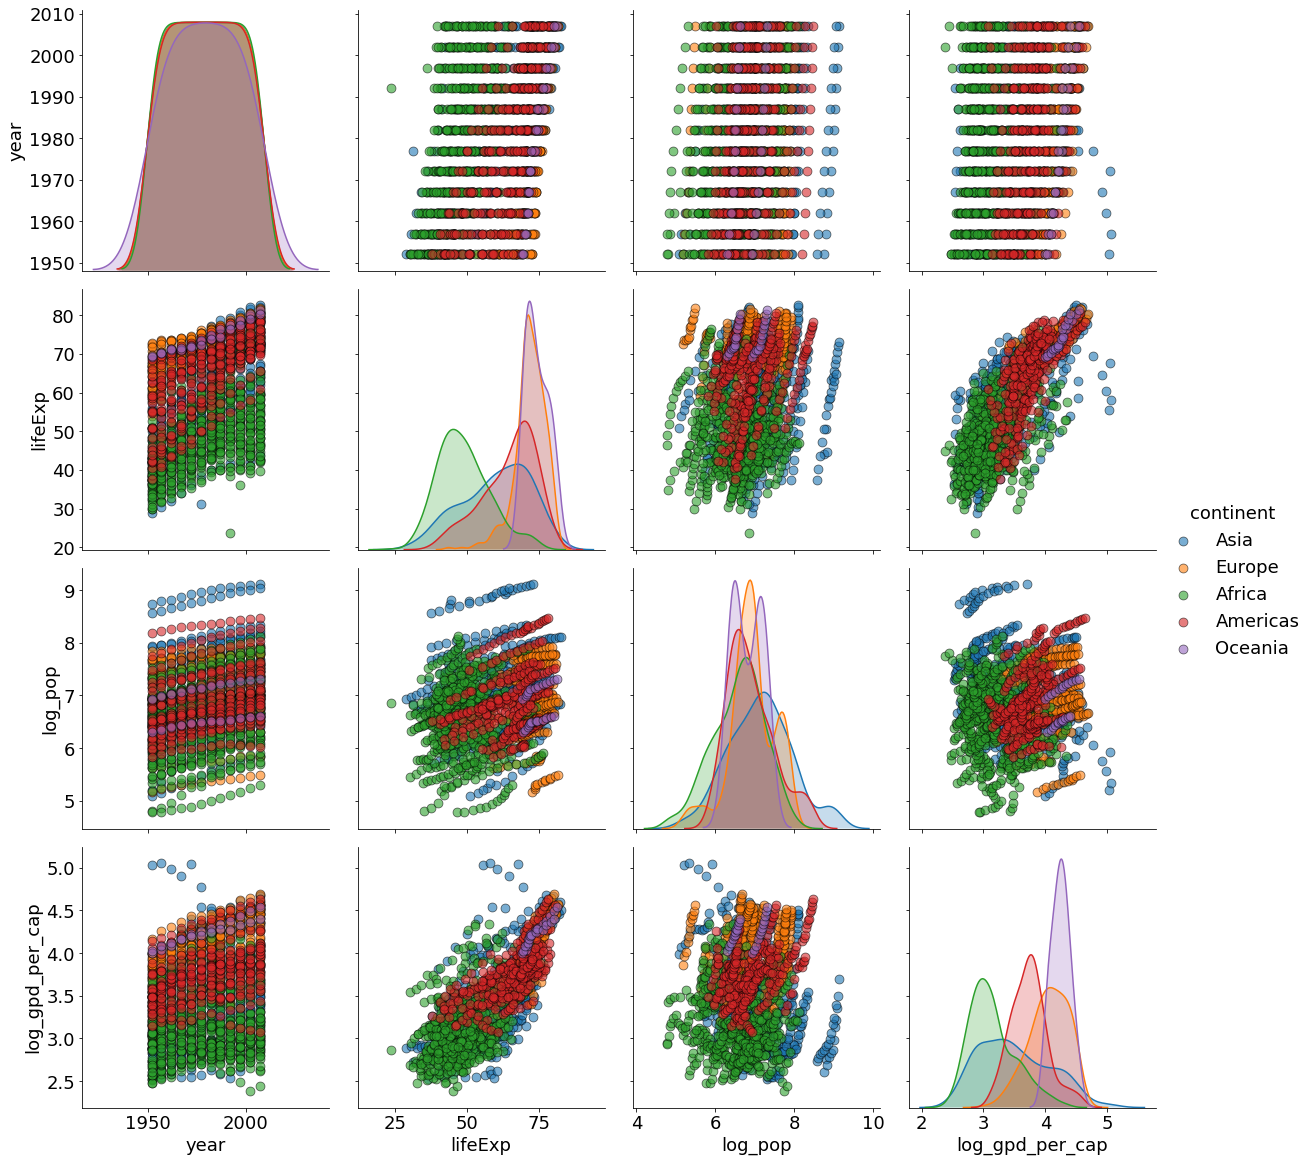

In [27]:
sns.pairplot(df,hue = 'continent',diag_kind = 'kde',plot_kws = {'alpha':0.6,
                                                               's':80,
                                                                'edgecolor':'k'}, height = 4)

Changing the transparency of the scatter plots increases readability because there is considerable overlap (known as overplotting) on these figures.